# Polinomios de Taylor

De manera analítica se tiene que lospolinomios de Taylor son:

$$ P_n(x) = \sum_{k=o}^{n} [\frac{(f^k)(x_0)}{k!}(x-x_0)^k] $$

La función de interes es la siguiente:

$ f(x) = xsen(x)$, con centro en $ x=2 $

### Se importan las librerias a utilizar y se define la función:

In [139]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
x = sym.Symbol('x')
fx = x*sym.sin(x)
x0 = 2 # es el valor centrado

### Se obtiene la derivada decada orden:

In [140]:
print(f'La función es: {fx}')
n = 6
derivx0 = [0.0,0.0,0.0,0.0,0.0,0.0]
for i in np.arange(n):
  deriv = fx.diff(x,i)
  derivx0[i] = float(deriv.subs(x,x0).evalf())
  print(f'La derivada de orden {i} es {deriv}')

La función es: x*sin(x)
La derivada de orden 0 es x*sin(x)
La derivada de orden 1 es x*cos(x) + sin(x)
La derivada de orden 2 es -x*sin(x) + 2*cos(x)
La derivada de orden 3 es -(x*cos(x) + 3*sin(x))
La derivada de orden 4 es x*sin(x) - 4*cos(x)
La derivada de orden 5 es x*cos(x) + 5*sin(x)


### Determinación de los polinomios de cero a cinco:

In [141]:
k=0
P=['','','','','','']
polinom = 0
while k<n:
  denom = float(np.math.factorial(k))
  terminok = (derivx0[k]/denom)*(x-x0)**k
  polinom  = polinom + terminok
  P[k] = polinom.expand()
  print(f'\nEl polinomio de orden {k} es:\n{polinom.expand()}')
  k = k + 1

print(np.transpose(P))


El polinomio de orden 0 es:
1.81859485365136

El polinomio de orden 1 es:
0.0770037537313969*x + 1.66458734618857

El polinomio de orden 2 es:
-1.32544426337282*x**2 + 5.37878080722269*x - 3.63718970730273

El polinomio de orden 3 es:
-0.31593310123046*x**3 + 0.570154344009936*x**2 + 1.58758359245717*x - 1.10972489745905

El polinomio de orden 4 es:
0.145132591659997*x**4 - 1.47699383451044*x**3 + 4.05333654384987*x**2 - 3.05665934066274*x + 1.21239656910091

El polinomio de orden 5 es:
0.0309516121752844*x**5 - 0.164383530092846*x**4 - 0.238929347499063*x**3 + 1.57720756982712*x**2 - 0.580530366639989*x + 0.221944979491809
[1.81859485365136 0.0770037537313969*x + 1.66458734618857
 -1.32544426337282*x**2 + 5.37878080722269*x - 3.63718970730273
 -0.31593310123046*x**3 + 0.570154344009936*x**2 + 1.58758359245717*x - 1.10972489745905
 0.145132591659997*x**4 - 1.47699383451044*x**3 + 4.05333654384987*x**2 - 3.05665934066274*x + 1.21239656910091
 0.0309516121752844*x**5 - 0.164383530092846

### Comparación gráfica:

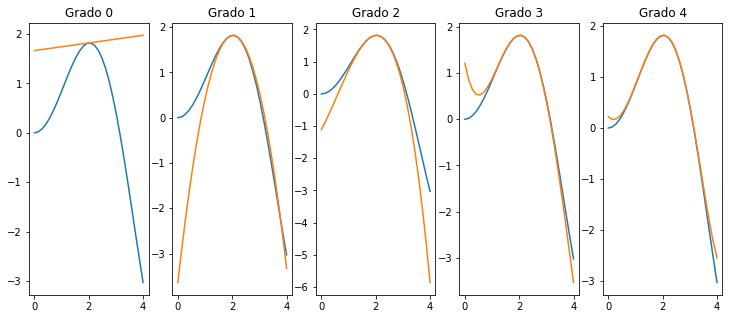

In [142]:
# pasar la funcion simbolica a una función numérica:
fx_num = sym.lambdify(x,fx)
xi = np.linspace(0,4,30)
fxi = fx_num(xi)
plt.figure(figsize=(15,5))

for i in np.arange(5):
  polinom_num = sym.lambdify(x,P[i+1])
# Grafica a partir de los puntos x, f(x):
  pxi = polinom_num(xi)
  plt.subplot(1,6,i+1)
  plt.plot(xi,fxi)
  plt.plot(xi,pxi)
  plt.title(f'Grado {i}')

plt.show()

### Análisis:

Se observa que en la medida que va aumentando el grado del polinomio, la grafica se va haciendo cada vez mas parecida a la función original. Para esto, lo que se realizó fue calcular los valores para las funciones simbolicas y posteriormente, pasarla a valoresnumericos, los cuales fueron graficados, obteniendo una gráfica muy similar a la original con un orden 5.